# Purpose

This script creates some quick visualizations of the model output and performance to see if the model is overfit or underfit. We look at the training histories, predicted/observed plots, and timeseries plots to see what the data look like in time.

In [34]:
#high level modules
import os
import imp
import pandas as pd
import numpy as np

# ml/ai modules
from sklearn.metrics import mean_squared_error, mean_absolute_error
# import pydot
import matplotlib.pyplot as plt


In [35]:
# import custom modules
this_dir = "/Users/steeleb/Documents/GitHub/NASA-NW/modeling/SMR_temp_forecast/arNN_summary/"
imp.load_source("universals", os.path.join(this_dir, "universal_functions.py"))
from universals import load_pickle_file, twotemp_labels_features, predict_2_values, print_error_metrics
imp.load_source("vis", os.path.join(this_dir, "vis_functions.py"))
from vis import create_scatter_plot, ts_plot


### Visualize Loss in Training and Validation

Load in training histories models from pickle files craeted in `_leaky_basic_5_vis_t2023.ipynb` 

In [36]:
# model directory path
model_dir = '/Users/steeleb/Documents/GitHub/NASA-NW/data/NN_train_val_test/SMR_forecast/models/leaky_5_summary_t2023/'

histories = [f for f in os.listdir(model_dir) if 'history' in f]
histories.sort()

history_1 = load_pickle_file(histories[0], model_dir)
history_2 = load_pickle_file(histories[1], model_dir)
history_3 = load_pickle_file(histories[2], model_dir)
history_4 = load_pickle_file(histories[3], model_dir)
history_5 = load_pickle_file(histories[4], model_dir)
history_6 = load_pickle_file(histories[5], model_dir)
history_7 = load_pickle_file(histories[6], model_dir)
history_8 = load_pickle_file(histories[7], model_dir)
history_9 = load_pickle_file(histories[8], model_dir)


And plot the loss in training and validation datasets to see if the model is overfitting or underfitting.

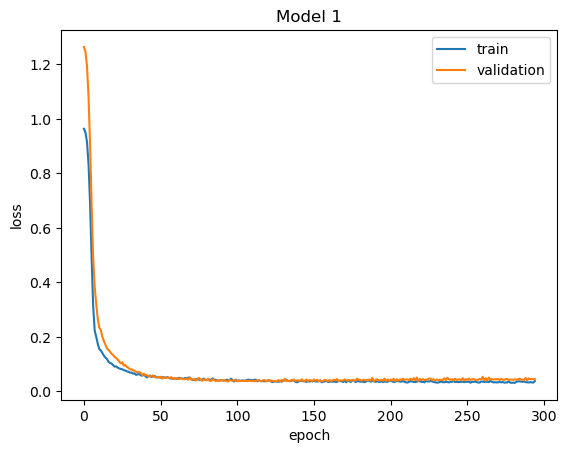

In [37]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.title('Model 1')
plt.show()

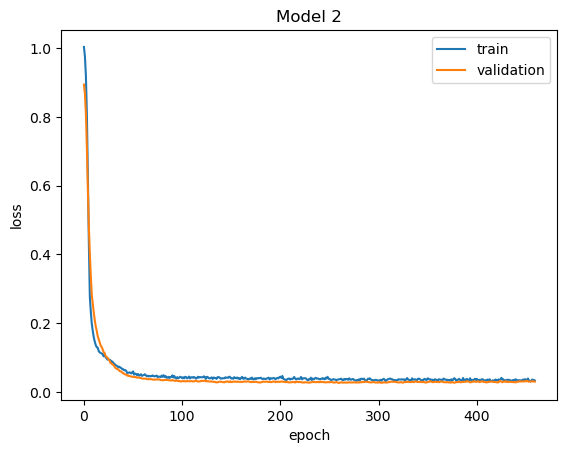

In [38]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.title('Model 2')
plt.show()

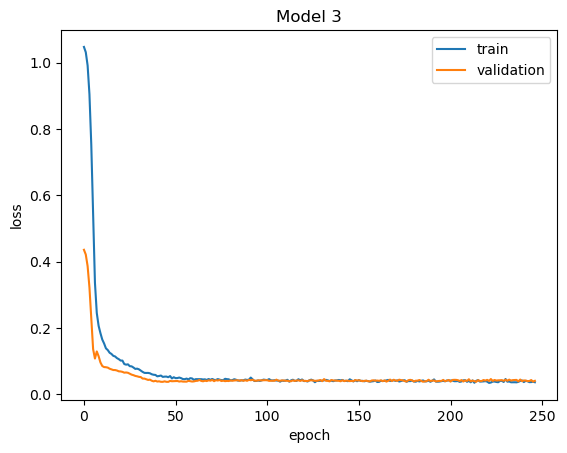

In [39]:
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.title('Model 3')
plt.show()

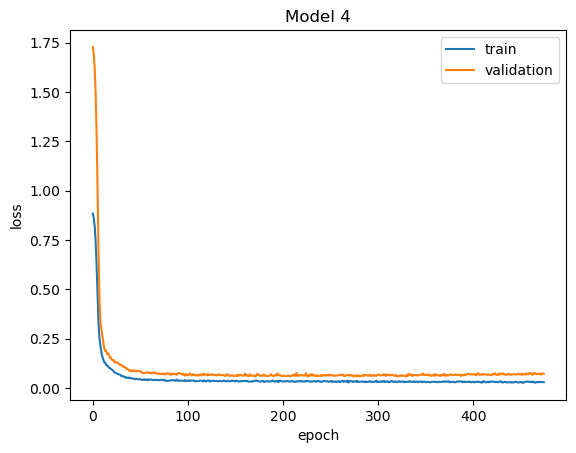

In [40]:
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.title('Model 4')
plt.show()

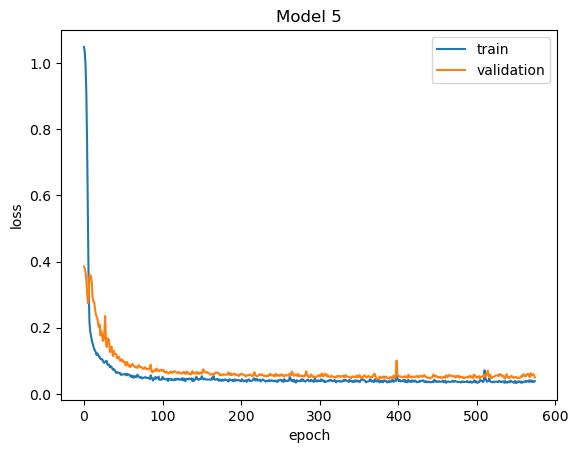

In [41]:
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.title('Model 5')
plt.show()

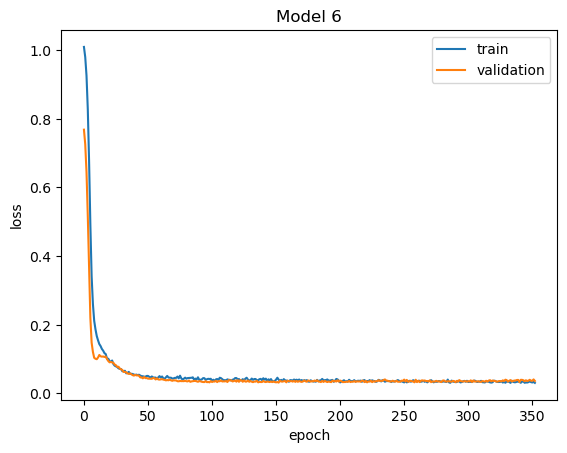

In [42]:
plt.plot(history_6.history['loss'])
plt.plot(history_6.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.title('Model 6')
plt.show()

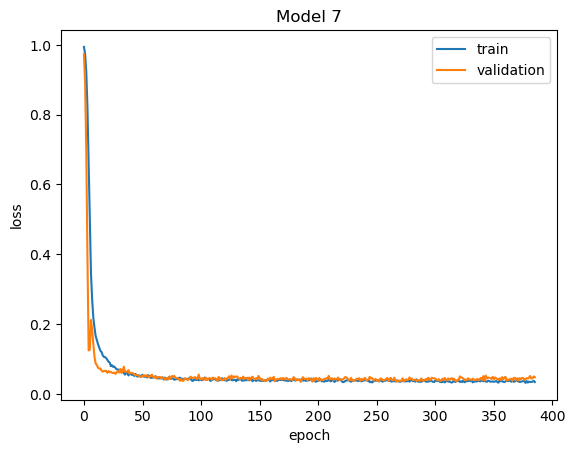

In [43]:
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.title('Model 7')
plt.show()

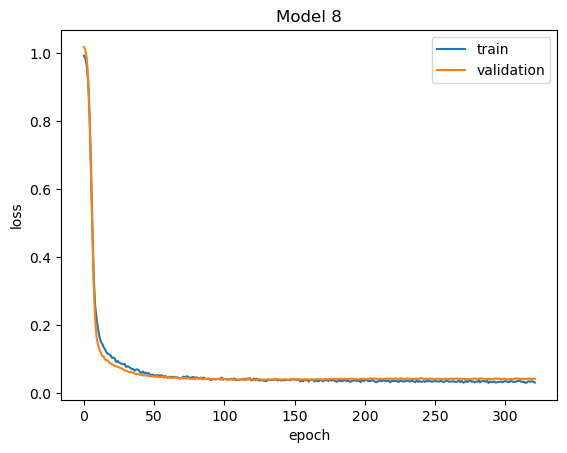

In [44]:
plt.plot(history_8.history['loss'])
plt.plot(history_8.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.title('Model 8')
plt.show()

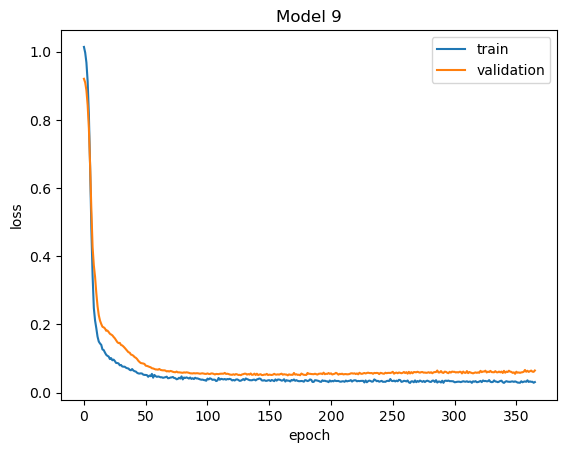

In [45]:
plt.plot(history_9.history['loss'])
plt.plot(history_9.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.title('Model 9')
plt.show()

### Visualize Predicted vs Observed

In order to do this, we need to load in the data

In [46]:
data_dir = "/Users/steeleb/Documents/GitHub/NASA-NW/data/NN_train_val_test/SMR_forecast/met_summary/"

all_files = pd.Series(os.listdir(data_dir))
t2023 = all_files[all_files.str.contains('t2023')]
t2023_val = t2023[t2023.str.contains('validation')]
t2023_train = t2023[t2023.str.contains('training')]

# these files end up in no particular order, so we need to sort them
t2023_val = t2023_val.sort_values()
t2023_train = t2023_train.sort_values()

def load_data(file):
    return pd.read_csv(os.path.join(data_dir, file), sep=',')

val1 = load_data(t2023_val.values[0])
train1 = load_data(t2023_train.values[0])

val2 = load_data(t2023_val.values[1])
train2 = load_data(t2023_train.values[1])

val3 = load_data(t2023_val.values[2])
train3 = load_data(t2023_train.values[2])

val4 = load_data(t2023_val.values[3])
train4 = load_data(t2023_train.values[3])

val5 = load_data(t2023_val.values[4])
train5 = load_data(t2023_train.values[4])

val6 = load_data(t2023_val.values[5])
train6 = load_data(t2023_train.values[5])

val7 = load_data(t2023_val.values[6])
train7 = load_data(t2023_train.values[6])

val8 = load_data(t2023_val.values[7])
train8 = load_data(t2023_train.values[7])

val9 = load_data(t2023_val.values[8])
train9 = load_data(t2023_train.values[8])

And then create the feature and lables for training and validation datasets

In [47]:
features1, labels_1, val_features1, val_labels_1 = twotemp_labels_features(train1, val1)
features2, labels_2, val_features2, val_labels_2 = twotemp_labels_features(train2, val2)
features3, labels_3, val_features3, val_labels_3 = twotemp_labels_features(train3, val3)
features4, labels_4, val_features4, val_labels_4 = twotemp_labels_features(train4, val4)
features5, labels_5, val_features5, val_labels_5 = twotemp_labels_features(train5, val5)
features6, labels_6, val_features6, val_labels_6 = twotemp_labels_features(train6, val6)
features7, labels_7, val_features7, val_labels_7 = twotemp_labels_features(train7, val7)
features8, labels_8, val_features8, val_labels_8 = twotemp_labels_features(train8, val8)
features9, labels_9, val_features9, val_labels_9 = twotemp_labels_features(train9, val9)

And load the pickle files from the `_leaky_basic_5_model_t2023.ipynb` notebook

In [48]:
models = [f for f in os.listdir(model_dir) if 'history' not in f]

model_1 = load_pickle_file(models[0], model_dir)
model_2 = load_pickle_file(models[1], model_dir)
model_3 = load_pickle_file(models[2], model_dir)
model_4 = load_pickle_file(models[3], model_dir)
model_5 = load_pickle_file(models[4], model_dir)
model_6 = load_pickle_file(models[5], model_dir)
model_7 = load_pickle_file(models[6], model_dir)
model_8 = load_pickle_file(models[7], model_dir)
model_9 = load_pickle_file(models[8], model_dir)


And then we need to transform the label data back to the original scale. 

In [49]:
transform = pd.read_csv(os.path.join(data_dir, "mean_std_train_val_summary_t2023_v2024-11-29.csv"), sep=',')
transform = transform.rename(columns={"Unnamed: 0": "feature"}).set_index("feature")

t_mean_1m = transform['mean'].get('mean_1m_temp_degC')
t_std_1m = transform['std'].get('mean_1m_temp_degC')

t_mean_05m = transform['mean'].get('mean_0_5m_temp_degC')
t_std_05m = transform['std'].get('mean_0_5m_temp_degC')

Now, we'll u se the model to predict the labels for the training and validation datasets using the mean and standard deviations from the preprocessing routine.

In [50]:
# Call predict_values for each dataset
p_train_1m_1, p_train_05m_1, act_train_1m_1, act_train_05m_1, p_val_1m_1, p_val_05m_1, act_val_1m_1, act_val_05m_1 = predict_2_values(model_1, features1, val_features1, labels_1, val_labels_1, t_mean_1m, t_mean_05m, t_std_1m, t_std_05m)
p_train_1m_2, p_train_05m_2, act_train_1m_2, act_train_05m_2, p_val_1m_2, p_val_05m_2, act_val_1m_2, act_val_05m_2 = predict_2_values(model_2, features2, val_features2, labels_2, val_labels_2, t_mean_1m, t_mean_05m, t_std_1m, t_std_05m)
p_train_1m_3, p_train_05m_3, act_train_1m_3, act_train_05m_3, p_val_1m_3, p_val_05m_3, act_val_1m_3, act_val_05m_3 = predict_2_values(model_3, features3, val_features3, labels_3, val_labels_3, t_mean_1m, t_mean_05m, t_std_1m, t_std_05m)
p_train_1m_4, p_train_05m_4, act_train_1m_4, act_train_05m_4, p_val_1m_4, p_val_05m_4, act_val_1m_4, act_val_05m_4 = predict_2_values(model_4, features4, val_features4, labels_4, val_labels_4, t_mean_1m, t_mean_05m, t_std_1m, t_std_05m)
p_train_1m_5, p_train_05m_5, act_train_1m_5, act_train_05m_5, p_val_1m_5, p_val_05m_5, act_val_1m_5, act_val_05m_5 = predict_2_values(model_5, features5, val_features5, labels_5, val_labels_5, t_mean_1m, t_mean_05m, t_std_1m, t_std_05m)
p_train_1m_6, p_train_05m_6, act_train_1m_6, act_train_05m_6, p_val_1m_6, p_val_05m_6, act_val_1m_6, act_val_05m_6 = predict_2_values(model_6, features6, val_features6, labels_6, val_labels_6, t_mean_1m, t_mean_05m, t_std_1m, t_std_05m)
p_train_1m_7, p_train_05m_7, act_train_1m_7, act_train_05m_7, p_val_1m_7, p_val_05m_7, act_val_1m_7, act_val_05m_7 = predict_2_values(model_7, features7, val_features7, labels_7, val_labels_7, t_mean_1m, t_mean_05m, t_std_1m, t_std_05m)
p_train_1m_8, p_train_05m_8, act_train_1m_8, act_train_05m_8, p_val_1m_8, p_val_05m_8, act_val_1m_8, act_val_05m_8 = predict_2_values(model_8, features8, val_features8, labels_8, val_labels_8, t_mean_1m, t_mean_05m, t_std_1m, t_std_05m)
p_train_1m_9, p_train_05m_9, act_train_1m_9, act_train_05m_9, p_val_1m_9, p_val_05m_9, act_val_1m_9, act_val_05m_9 = predict_2_values(model_9, features9, val_features9, labels_9, val_labels_9, t_mean_1m, t_mean_05m, t_std_1m, t_std_05m)

Finally, we can plot the predicted vs observed values for the training and validation datasets.

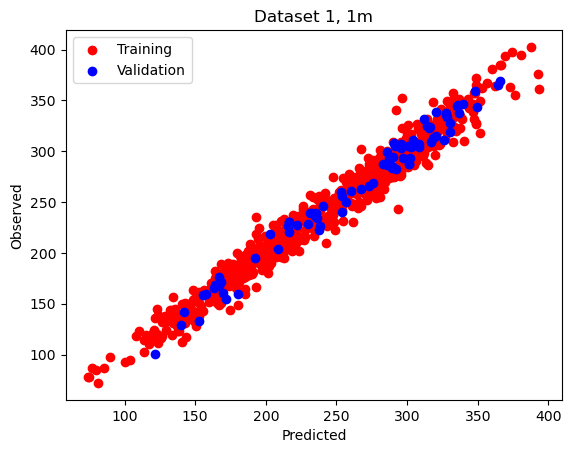

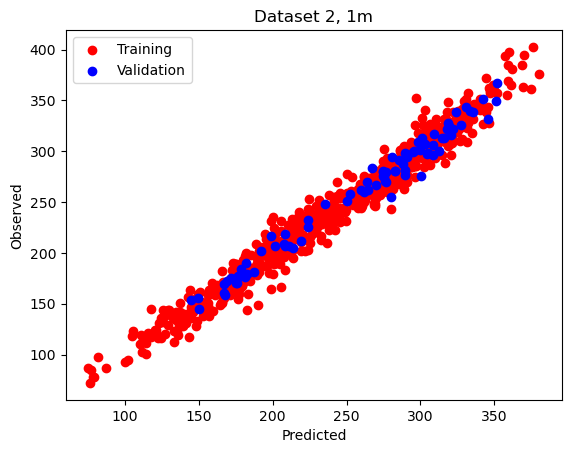

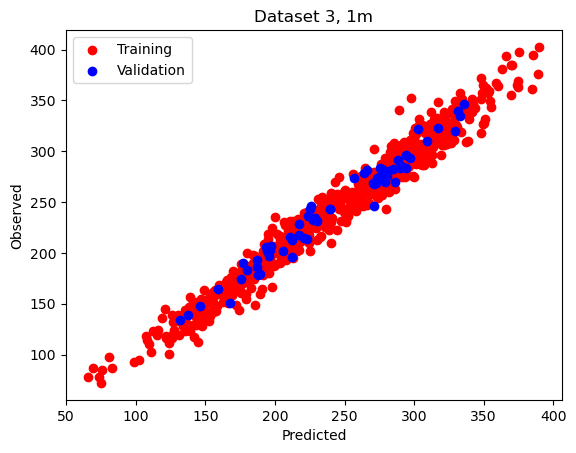

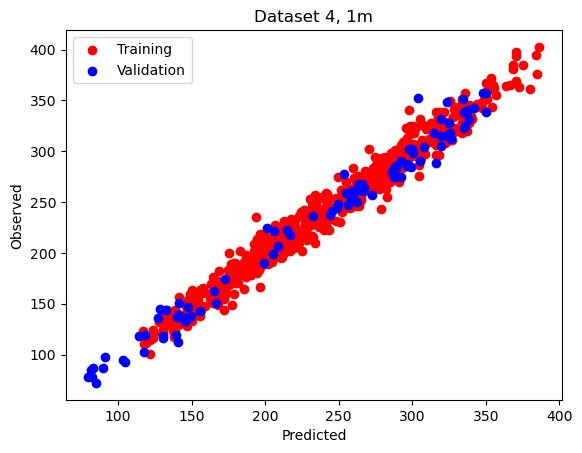

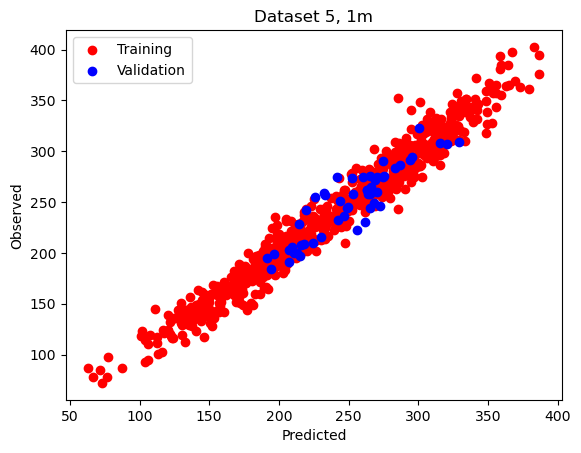

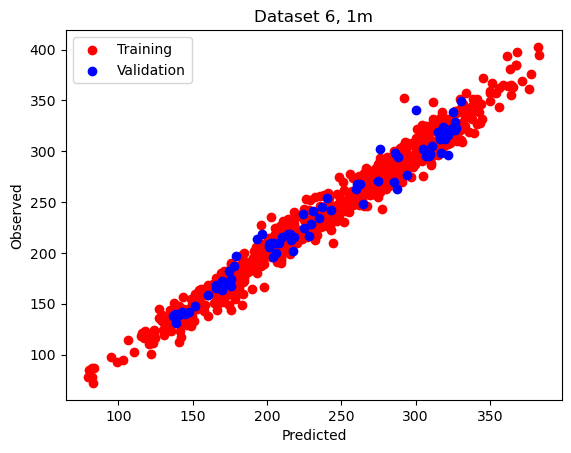

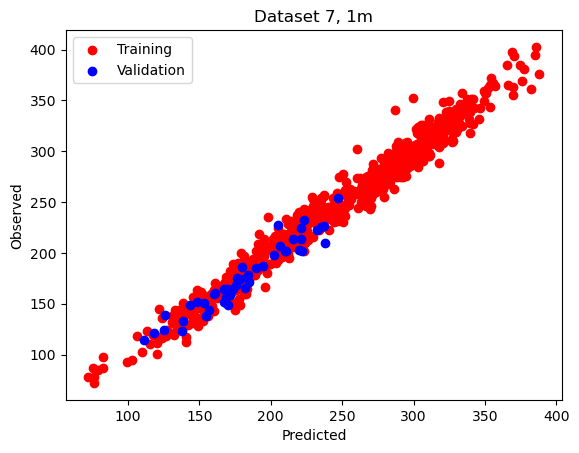

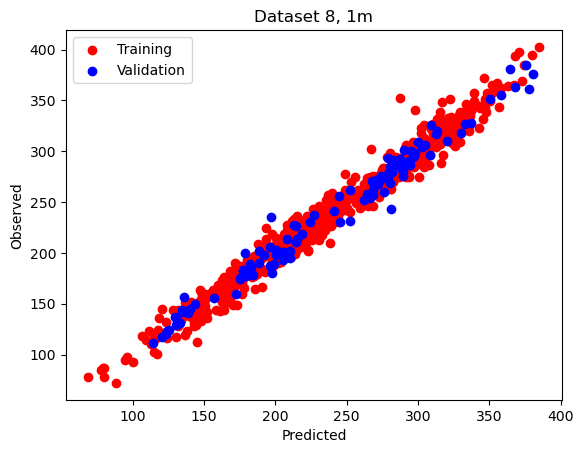

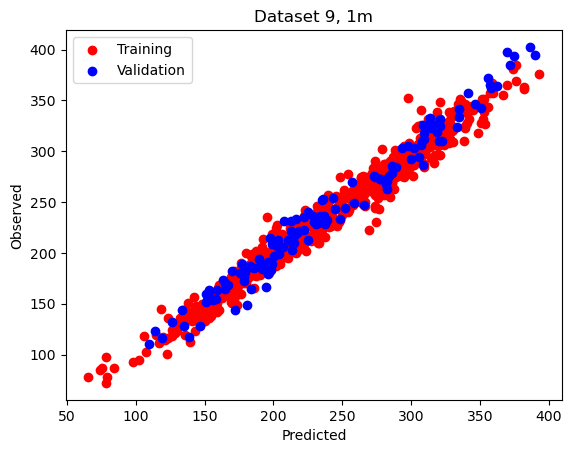

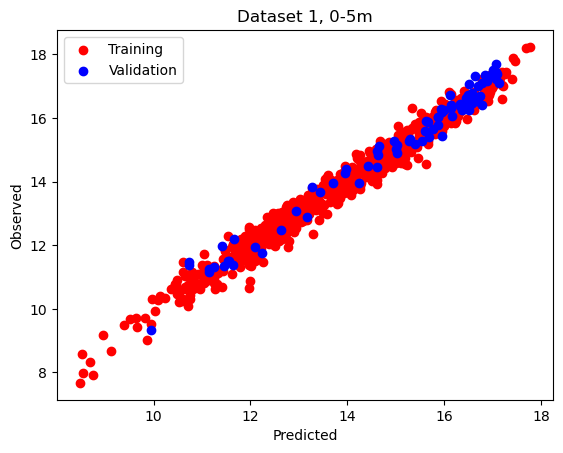

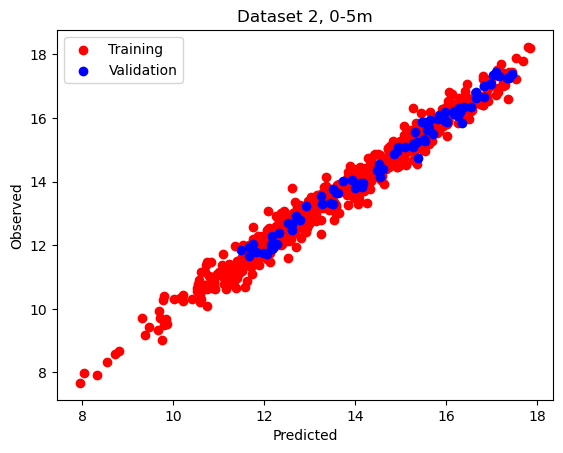

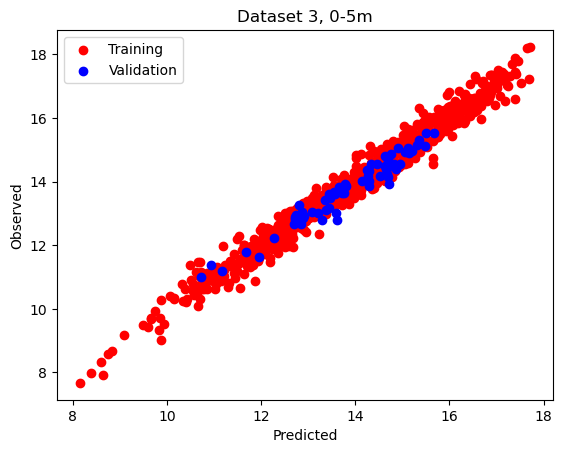

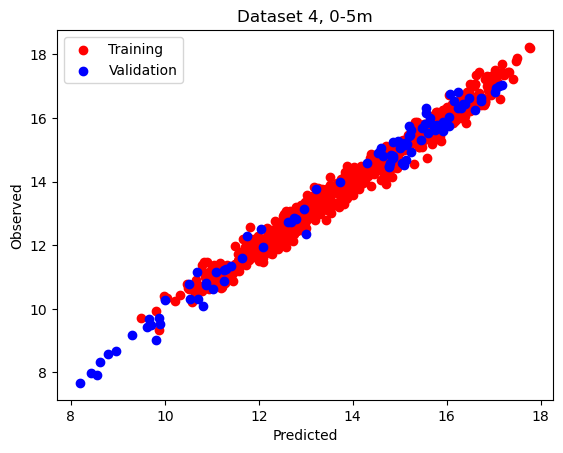

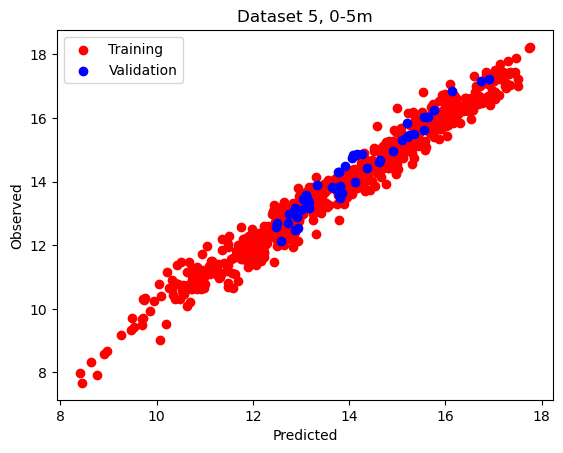

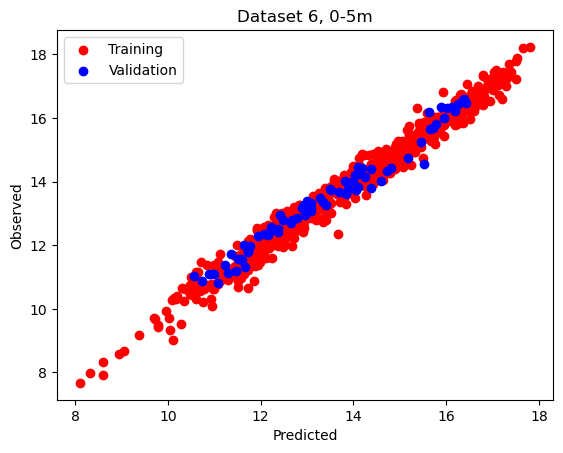

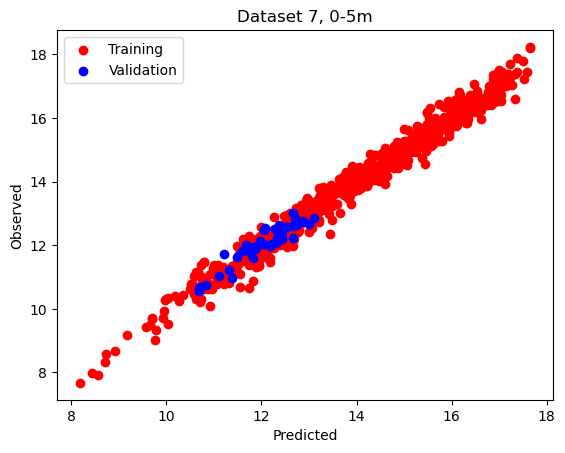

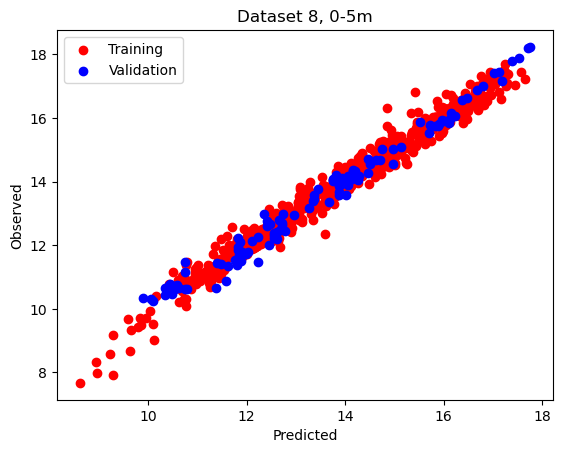

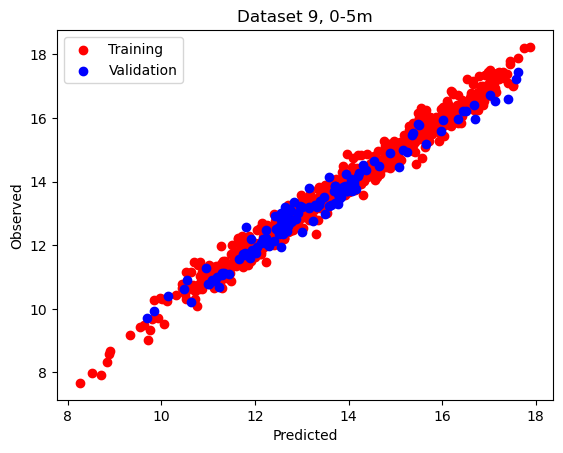

In [51]:
create_scatter_plot('Dataset 1, 1m', p_val_1m_1, act_val_1m_1, p_train_1m_1, act_train_1m_1)
create_scatter_plot('Dataset 2, 1m', p_val_1m_2, act_val_1m_2, p_train_1m_2, act_train_1m_2)
create_scatter_plot('Dataset 3, 1m', p_val_1m_3, act_val_1m_3, p_train_1m_3, act_train_1m_3)
create_scatter_plot('Dataset 4, 1m', p_val_1m_4, act_val_1m_4, p_train_1m_4, act_train_1m_4)
create_scatter_plot('Dataset 5, 1m', p_val_1m_5, act_val_1m_5, p_train_1m_5, act_train_1m_5)
create_scatter_plot('Dataset 6, 1m', p_val_1m_6, act_val_1m_6, p_train_1m_6, act_train_1m_6)
create_scatter_plot('Dataset 7, 1m', p_val_1m_7, act_val_1m_7, p_train_1m_7, act_train_1m_7)
create_scatter_plot('Dataset 8, 1m', p_val_1m_8, act_val_1m_8, p_train_1m_8, act_train_1m_8)
create_scatter_plot('Dataset 9, 1m', p_val_1m_9, act_val_1m_9, p_train_1m_9, act_train_1m_9)

create_scatter_plot('Dataset 1, 0-5m', p_val_05m_1, act_val_05m_1, p_train_05m_1, act_train_05m_1)
create_scatter_plot('Dataset 2, 0-5m', p_val_05m_2, act_val_05m_2, p_train_05m_2, act_train_05m_2)
create_scatter_plot('Dataset 3, 0-5m', p_val_05m_3, act_val_05m_3, p_train_05m_3, act_train_05m_3)
create_scatter_plot('Dataset 4, 0-5m', p_val_05m_4, act_val_05m_4, p_train_05m_4, act_train_05m_4)
create_scatter_plot('Dataset 5, 0-5m', p_val_05m_5, act_val_05m_5, p_train_05m_5, act_train_05m_5)
create_scatter_plot('Dataset 6, 0-5m', p_val_05m_6, act_val_05m_6, p_train_05m_6, act_train_05m_6)
create_scatter_plot('Dataset 7, 0-5m', p_val_05m_7, act_val_05m_7, p_train_05m_7, act_train_05m_7)
create_scatter_plot('Dataset 8, 0-5m', p_val_05m_8, act_val_05m_8, p_train_05m_8, act_train_05m_8)
create_scatter_plot('Dataset 9, 0-5m', p_val_05m_9, act_val_05m_9, p_train_05m_9, act_train_05m_9)


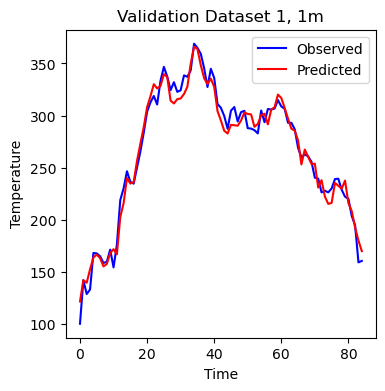

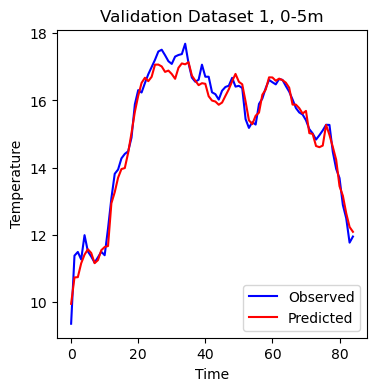

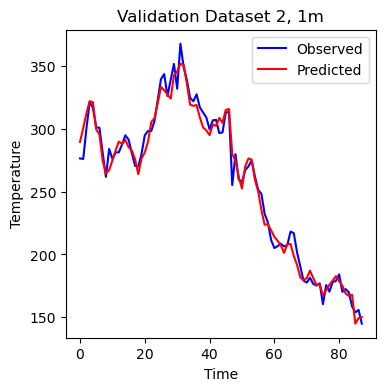

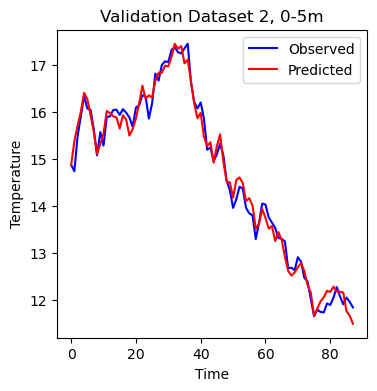

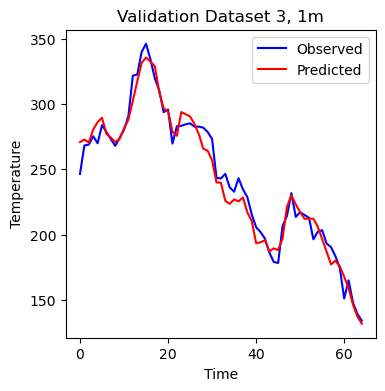

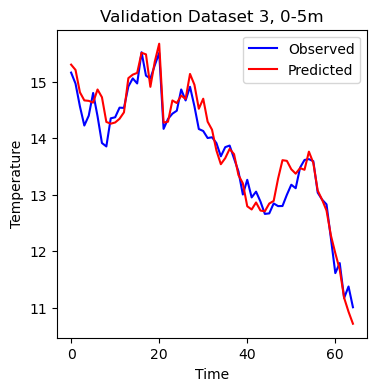

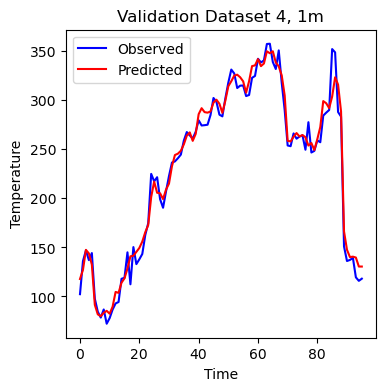

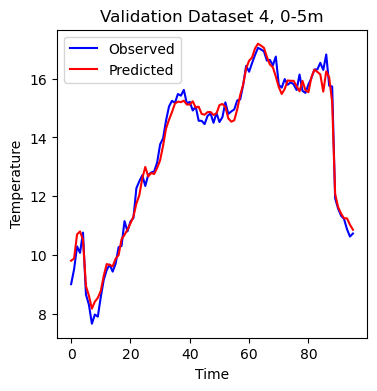

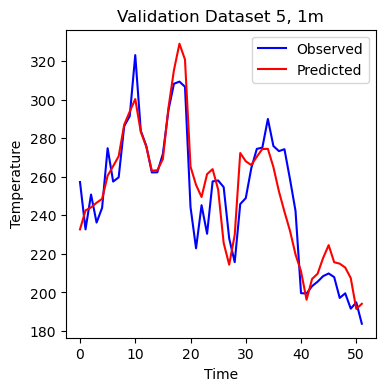

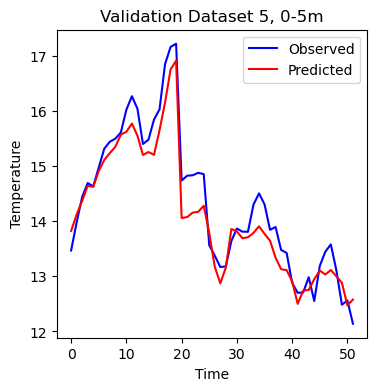

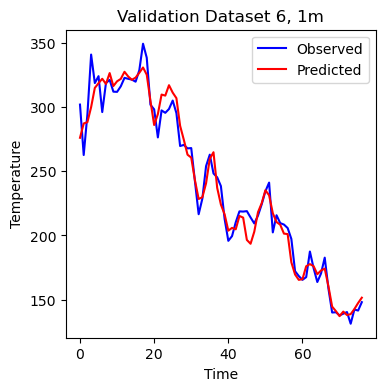

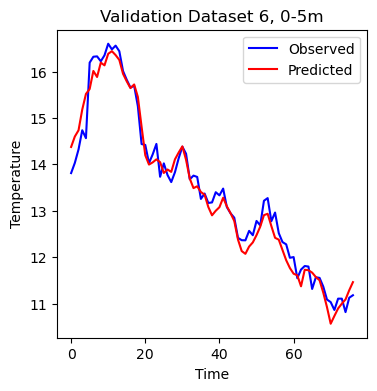

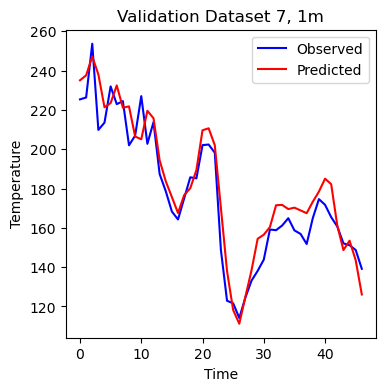

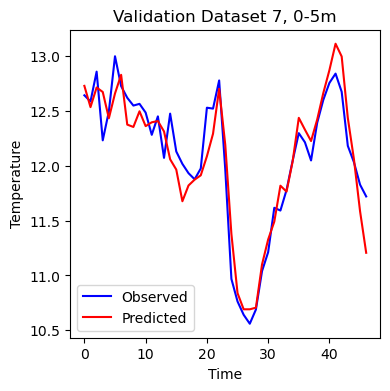

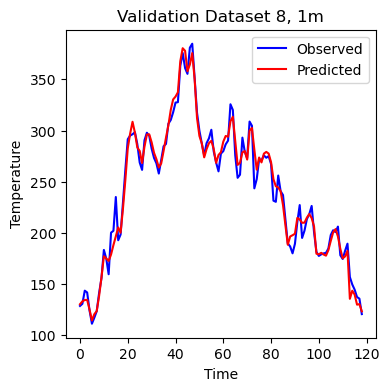

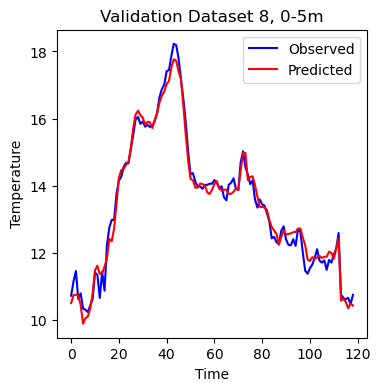

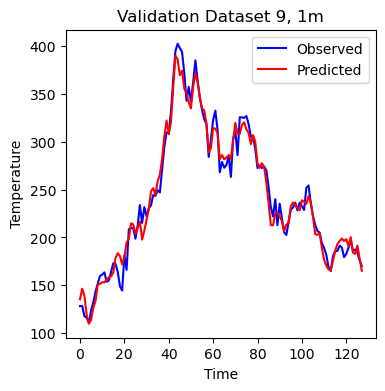

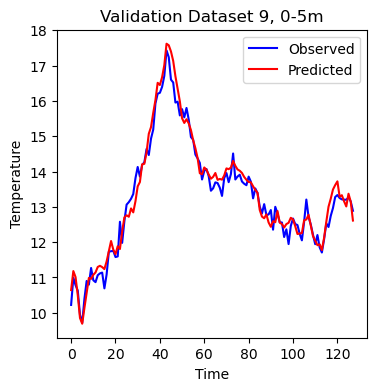

In [52]:
ts_plot(act_val_1m_1, p_val_1m_1, 'Validation Dataset 1, 1m')
ts_plot(act_val_05m_1, p_val_05m_1, 'Validation Dataset 1, 0-5m')
ts_plot(act_val_1m_2, p_val_1m_2, 'Validation Dataset 2, 1m')
ts_plot(act_val_05m_2, p_val_05m_2, 'Validation Dataset 2, 0-5m')
ts_plot(act_val_1m_3, p_val_1m_3, 'Validation Dataset 3, 1m')
ts_plot(act_val_05m_3, p_val_05m_3, 'Validation Dataset 3, 0-5m')
ts_plot(act_val_1m_4, p_val_1m_4, 'Validation Dataset 4, 1m')
ts_plot(act_val_05m_4, p_val_05m_4, 'Validation Dataset 4, 0-5m')
ts_plot(act_val_1m_5, p_val_1m_5, 'Validation Dataset 5, 1m')
ts_plot(act_val_05m_5, p_val_05m_5, 'Validation Dataset 5, 0-5m')
ts_plot(act_val_1m_6, p_val_1m_6, 'Validation Dataset 6, 1m')
ts_plot(act_val_05m_6, p_val_05m_6, 'Validation Dataset 6, 0-5m')
ts_plot(act_val_1m_7, p_val_1m_7, 'Validation Dataset 7, 1m')
ts_plot(act_val_05m_7, p_val_05m_7, 'Validation Dataset 7, 0-5m')
ts_plot(act_val_1m_8, p_val_1m_8, 'Validation Dataset 8, 1m')
ts_plot(act_val_05m_8, p_val_05m_8, 'Validation Dataset 8, 0-5m')
ts_plot(act_val_1m_9, p_val_1m_9, 'Validation Dataset 9, 1m')
ts_plot(act_val_05m_9, p_val_05m_9, 'Validation Dataset 9, 0-5m')


In [53]:
# loop through datasets 1-4 at 1m
for i in range(1, 9):
    act_train_1m = globals()["act_train_1m_" + str(i)]
    pred_train_1m = globals()["p_train_1m_" + str(i)]
    act_val_1m = globals()["act_val_1m_" + str(i)]
    pred_val_1m = globals()["p_val_1m_" + str(i)]
    print_error_metrics(i, np.sqrt(act_train_1m), np.sqrt(pred_train_1m), np.sqrt(act_val_1m), np.sqrt(pred_val_1m))


DATASET 1
Mean Squared Error for Training Dataset 1 : 0.1522211678022854
Mean Absolute Error for Training Dataset 1 : 0.3033430785093302
Mean Squared Error for Validation Dataset 1 : 0.09942614620928672
Mean Absolute Error for Validation Dataset 1 : 0.24691745148419858
 
DATASET 2
Mean Squared Error for Training Dataset 2 : 0.15239643103619563
Mean Absolute Error for Training Dataset 2 : 0.2971400233938867
Mean Squared Error for Validation Dataset 2 : 0.0626088176617326
Mean Absolute Error for Validation Dataset 2 : 0.19807175362636106
 
DATASET 3
Mean Squared Error for Training Dataset 3 : 0.15189632712669712
Mean Absolute Error for Training Dataset 3 : 0.30361907757370143
Mean Squared Error for Validation Dataset 3 : 0.08829759919783832
Mean Absolute Error for Validation Dataset 3 : 0.23054225570616835
 
DATASET 4
Mean Squared Error for Training Dataset 4 : 0.1154203859152346
Mean Absolute Error for Training Dataset 4 : 0.26464387852541693
Mean Squared Error for Validation Dataset 4 

In [54]:
# and a 0-5m
for i in range(1, 9):
    act_train_05m = globals()["act_train_05m_" + str(i)]
    pred_train_05m = globals()["p_train_05m_" + str(i)]
    act_val_05m = globals()["act_val_05m_" + str(i)]
    pred_val_05m = globals()["p_val_05m_" + str(i)]
    print_error_metrics(i, act_train_05m, pred_train_05m, act_val_05m, pred_val_05m)


DATASET 1
Mean Squared Error for Training Dataset 1 : 0.08990606354218815
Mean Absolute Error for Training Dataset 1 : 0.23409412142245378
Mean Squared Error for Validation Dataset 1 : 0.09149359327578395
Mean Absolute Error for Validation Dataset 1 : 0.24191034134503006
 
DATASET 2
Mean Squared Error for Training Dataset 2 : 0.09213172893040074
Mean Absolute Error for Training Dataset 2 : 0.23588728143688745
Mean Squared Error for Validation Dataset 2 : 0.0431026063751689
Mean Absolute Error for Validation Dataset 2 : 0.17106888517661056
 
DATASET 3
Mean Squared Error for Training Dataset 3 : 0.09496221456724331
Mean Absolute Error for Training Dataset 3 : 0.24124874441985886
Mean Squared Error for Validation Dataset 3 : 0.0776174155775268
Mean Absolute Error for Validation Dataset 3 : 0.2125090968093896
 
DATASET 4
Mean Squared Error for Training Dataset 4 : 0.07139082624525186
Mean Absolute Error for Training Dataset 4 : 0.21407994162475585
Mean Squared Error for Validation Dataset 

Just a quick reminder of the baseline: 

1m baseline

Mean Squared Error for 1m baseline : 0.23

Mean Absolute Error for 1m baseline : 0.38

0-5m baseline

Mean Squared Error for 0-5m baseline : 0.12

Mean Absolute Error for 0-5m baseline : 0.26

Our model absolutely slays. I want to test a smaller network, but this might be a winner! Let's look at the SHAP before that, though.